## Teleco Churn Prediction

## Venkat Radkakrishnan

## Dataset

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [19]:
## Importing necessary libraries
import pandas as pd

In [26]:
## Load Dataset
data = pd.read_csv('Customer-Churn.csv')

In [27]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Drop customerID column**: Removes the 'customerID' column from the dataset as it does not contribute to the predictive modeling process.

**Handle missing values in TotalCharges**: Converts the 'TotalCharges' column to numeric type, handling any errors encountered during the conversion. Missing values are replaced with the median value of the column.

**Handle missing values in other columns**: Imputes missing values in other columns using the median strategy and fills any remaining missing values using forward fill.

**Encode categorical variables**: Converts categorical variables into binary indicators (dummy variables) using one-hot encoding. This allows the categorical variables to be used as features in machine learning models.

**Scale numeric features**: Standardizes numeric features to have mean 0 and variance 1, ensuring that all features contribute equally to the model training process.

**Save preprocessed data**: Saves the preprocessed dataset to a CSV file for future use in modeling and analysis

In [28]:
# Drop customerID column
data.drop('customerID', axis=1, inplace=True)


# Handle missing values in TotalCharges
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Handle missing values in other columns
imputer = SimpleImputer(strategy='median')
data['TotalCharges'] = imputer.fit_transform(data[['TotalCharges']])
data.fillna(method='ffill', inplace=True)  # Forward fill for remaining missing values

# Encode categorical variables
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

# Scale numeric features
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[num_cols] = scaler.fit_transform(data[num_cols])

# Save preprocessed data
data.to_csv('preprocessed_customer_data.csv', index=False)

In [29]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,No,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.173244,No,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.959674,Yes,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.514251,-0.746535,-0.194766,No,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,-1.236724,0.197365,-0.940470,Yes,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


## Exploratory Data Analysis (EDA)
First step involves visualizing the distribution of churn within the dataset. This is achieved using a countplot, which provides a clear overview of the number of churned and non-churned customers. Understanding the distribution of churn is essential as it helps identify the prevalence of the churn phenomenon and its impact on the dataset.

Next, the relationship between tenure (the length of time a customer has been with the company) and churn is explored using a boxplot. This visualization helps to assess whether there are any differences in tenure between churned and non-churned customers. Understanding this relationship is crucial as it provides insights into whether customer loyalty, measured by tenure, influences churn behavior.

Finally, the relationship between monthly charges and churn is examined using another boxplot. This visualization aims to determine if there are any differences in monthly charges between churned and non-churned customers. Understanding this relationship is important as it helps identify potential factors contributing to churn, such as dissatisfaction with pricing or service offerings. Overall, these visualizations provide valuable insights into the distribution of churn and its relationship with key variables, aiding in the understanding of churn behavior and informing retention strategies

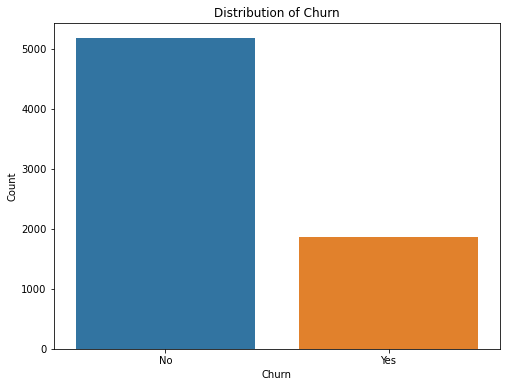

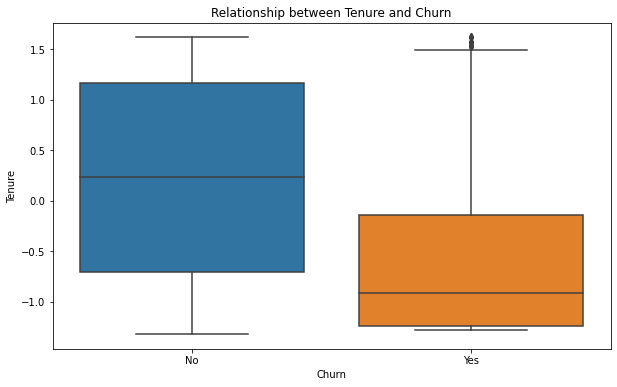

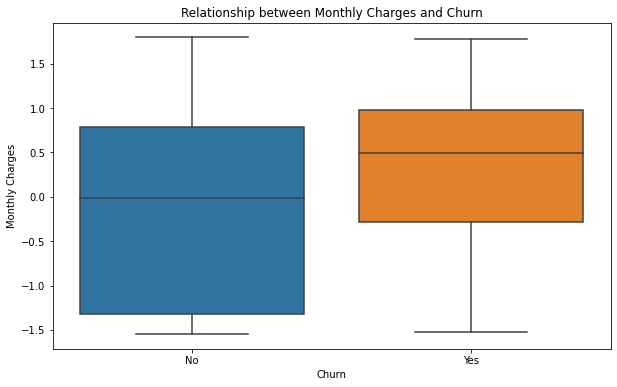

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Relationship between tenure and churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Relationship between Tenure and Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

# Relationship between monthly charges and churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Relationship between Monthly Charges and Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


## Model Training and  Evaluation
The steps involve data preprocessing, model training, and evaluation. 
First, the dataset is split into training and testing sets using the train_test_split function from sklearn.model_selection. This step is crucial for assessing the model's performance on unseen data. 

Next, three different classification models (Logistic Regression, Random Forest, Gradient Boosting) are trained on the training data using their respective algorithms. These models are then used to make predictions on the test data. 

Finally, evaluation metrics such as accuracy, precision, recall, and F1-score are calculated to assess the performance of each model. These steps are essential for building and evaluating machine learning models, providing insights into their effectiveness for predicting customer churn.

**Accuracy**: The proportion of correct predictions out of all predictions made by the model. It provides an overall measure of model performance but may not be suitable for imbalanced datasets.

**Precision**: The proportion of true positive predictions out of all positive predictions made by the model. It measures the model's ability to correctly identify positive instances (e.g., churned customers) without falsely labeling negative instances.

**Recall (Sensitivity)**: The proportion of true positive predictions out of all actual positive instances in the dataset. It measures the model's ability to correctly identify all positive instances, without missing any.

**F1-score**: The harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when there is an imbalance between the classes in the dataset.


These evaluation metrics provide insights into the effectiveness of the machine learning models for predicting customer churn.By comparing these metrics across different models, stakeholders can make informed decisions about which model performs best and is most suitable for deployment in real-world scenarios.
These metrics help in fine-tuning the models and improving their performance, ultimately leading to better decision-making and customer retention strategies.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into train and test sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Train random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Train gradient boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Evaluate models
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
lr_accuracy = accuracy_score(y_test, lr_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)
gb_accuracy = accuracy_score(y_test, gb_preds)

lr_precision = precision_score(y_test, lr_preds, pos_label='Yes')
rf_precision = precision_score(y_test, rf_preds, pos_label='Yes')
gb_precision = precision_score(y_test, gb_preds, pos_label='Yes')

lr_recall = recall_score(y_test, lr_preds, pos_label='Yes')
rf_recall = recall_score(y_test, rf_preds, pos_label='Yes')
gb_recall = recall_score(y_test, gb_preds, pos_label='Yes')

lr_f1_score = f1_score(y_test, lr_preds, pos_label='Yes')
rf_f1_score = f1_score(y_test, rf_preds, pos_label='Yes')
gb_f1_score = f1_score(y_test, gb_preds, pos_label='Yes')

In [34]:
# Code snippet for model evaluation
print("Logistic Regression Model:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1_score)
print()

print("Random Forest Model:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1_score)
print()

print("Gradient Boosting Model:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1 Score:", gb_f1_score)
print()



Logistic Regression Model:
Accuracy: 0.8211497515968772
Precision: 0.6861538461538461
Recall: 0.5978552278820375
F1 Score: 0.6389684813753581

Random Forest Model:
Accuracy: 0.7977288857345636
Precision: 0.664179104477612
Recall: 0.4772117962466488
F1 Score: 0.5553822152886115

Gradient Boosting Model:
Accuracy: 0.8090844570617459
Precision: 0.6721854304635762
Recall: 0.5442359249329759
F1 Score: 0.6014814814814815



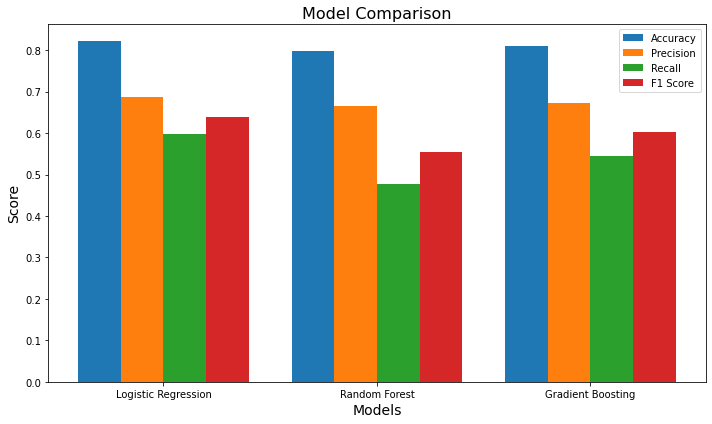

In [35]:
# Define model names
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Define metric scores for each model
accuracies = [lr_accuracy, rf_accuracy, gb_accuracy]
precisions = [lr_precision, rf_precision, gb_precision]
recalls = [lr_recall, rf_recall, gb_recall]
f1_scores = [lr_f1_score, rf_f1_score, gb_f1_score]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width
bar_width = 0.2

# Define index for bar positions
index = range(len(models))

# Plot bars for each metric
plt.bar(index, accuracies, bar_width, label='Accuracy')
plt.bar([idx + bar_width for idx in index], precisions, bar_width, label='Precision')
plt.bar([idx + 2 * bar_width for idx in index], recalls, bar_width, label='Recall')
plt.bar([idx + 3 * bar_width for idx in index], f1_scores, bar_width, label='F1 Score')

# Add labels, title, and legend
plt.xlabel('Models', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Model Comparison', fontsize=16)
plt.xticks([idx + 1.5 * bar_width for idx in index], models)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


**Logistic Regression Model**:

**Accuracy**: The model achieves an accuracy of 82.11%, indicating that it correctly predicts customer churn or retention in approximately 82.11% of cases. This suggests that the model performs well overall in classifying customers.

**Precision**: With a precision of 68.62%, the model correctly identifies about 68.62% of customers who are predicted to churn, while minimizing false positive predictions. This indicates that when the model predicts churn, it is correct approximately 68.62% of the time.

**Recall**: The model achieves a recall of 59.79%, meaning it correctly identifies approximately 59.79% of all actual churn cases. This suggests that the model captures nearly 59.79% of all churn cases, which is crucial for proactive intervention strategies.

**F1 Score**: The F1 score, which is the harmonic mean of precision and recall, is 63.90%. This provides a balanced measure of the model's performance, taking into account both precision and recall.

**Random Forest Model**:

The random forest model achieves an accuracy of 79.77%, precision of 66.42%, recall of 47.72%, and F1 score of 55.54%.
The lower recall compared to the logistic regression model suggests that the random forest model may miss more churn cases. However, it maintains a similar level of precision, indicating a balance between false positives and true positives.

**Gradient Boosting Model**:

The gradient boosting model achieves an accuracy of 80.91%, precision of 67.22%, recall of 54.42%, and F1 score of 60.15%.
Similar to the random forest model, the gradient boosting model exhibits slightly lower recall compared to the logistic regression model. However, it maintains a comparable level of precision, resulting in a balanced F1 score.

Overall, these evaluation metrics provide insights into the performance of each model in predicting customer churn. The logistic regression model demonstrates the highest accuracy and balanced precision-recall trade-offs, making it a favorable choice for practical applications in customer churn prediction. However, the random forest and gradient boosting models also offer competitive performance, with strengths in different aspects of model evaluation. Choosing the most suitable model depends on specific business requirements and trade-offs between precision and recall.